<b>¡Hola Andres!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

In [1]:
# Para comenzar cargaremos todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st



Cargaremos los datos en un Df.Afortunadamente parece un DF no tan complejo y se encuentra en una sola ruta de acceso.

In [2]:
vg=pd.read_csv('/datasets/games.csv')

## Exploración inicial de datos.

In [3]:
vg.info()
print()
vg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente uso de <code>vg.info()</code> y <code>vg.head()</code> para explorar el DataFrame. Identificaste correctamente las columnas con valores ausentes y mencionaste ideas preliminares para enriquecer los datos, como agregar columnas de ventas totales y promediar puntuaciones. Esto demuestra un buen entendimiento inicial de los datos. </div>

En un análisis muy inicial llama la atención que en 'year of release','critic Score' y 'rating' son las columnas donde observamos valores ausentes, por lo que habrá que confirmar ello o ver de qué se trata. Por otro lado year of release está en float por lo que conviene convertir a entero por tratarse de años.Las ventas están desagregadas por región por lo que podría considerarse agregar columnas con ventas totales (todas las regiones)y quizá adecuar los datos de critic y user score para quizá agregar una columna promediada de ambos ratings. Esto último es solo una idea para enriquecer nuestro data set y conforme se avance podremos confirmar o no si es necesario/ o buena propuesta.

## Corrección de datos

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
El cambio de mayúsculas a minúsculas en nombres de columnas y la conversión de tipos de datos son pasos bien ejecutados. También es positivo que justificaste el uso de la mediana para llenar valores ausentes, explicando que es menos sensible a outliers. </div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Optaste por rellenar valores ausentes de <code>critic_score</code> y <code>user_score</code> con medianas por año, pero sería útil validar cómo impacta esta decisión en el análisis posterior. Incluir un breve análisis sobre cómo cambian las estadísticas descriptivas después de esta imputación podría fortalecer tu argumentación.</div>

<div class="alert alert-block alert-warning">
<b>A resolver</b> <a class="tocSkip"></a>
Cuando imputaste valores de <code>critic_score</code> por año, usaste una solución generalizada, pero algunas categorías como plataformas o géneros podrían beneficiarse de imputaciones específicas. En futuras iteraciones, sería ideal incluir análisis para justificar por qué una imputación general por año es mejor que una segmentada.</div>


In [4]:
#Cambiamos de mayúsculas a minúsculas los nombres de columnas
columns_new ={
    "Name": "name",
    "Platform": "platform",
    "Year_of_Release": "year_of_release",
    "Genre":"genre",
    "NA_sales":"na_sales",
    "EU_sales":"eu_sales",
    "JP_sales":"jp_sales",
    "Other_sales":"other_sales",
    "Critic_Score":"critic_score",
    "User_Score":"user_score",
    "Rating":"rating",
    }

# Llama al método rename y pasa
# el diccionario como un argumento al parámetro columns
# y True como un argumento al parámetro inplace
vg.rename(columns = columns_new, inplace = True)
print(vg.columns)
vg.head()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Procedemos a cambiar el tipo de datos de la columna "year_of_release" para que sean de float a interger.Previo a ello depuramos los Nan que pueda tener.En este caso optamos por cambiar los Nan por un valor que no afecte nuestro análisis como 9999.
vg['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [6]:
vg['year_of_release'] = vg['year_of_release'].fillna(9999).astype(int)

In [7]:
vg.info()
print()
vg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Ahora comprobamos que los valores unicos de la columna platform para determinar la conversión a minusculas.
vg['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
#Parece no haber problema sin embargo para facilitar posibles cálculos optaremos por convertir la columna platform de object a category.
vg['platform'] = vg['platform'].astype('category')
print(vg['platform'].head())

0    Wii
1    NES
2    Wii
3    Wii
4     GB
Name: platform, dtype: category
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']


In [10]:
#Haremos lo mismo con la columna 'genre'
vg['genre'] = vg['genre'].astype('category')
print(vg['genre'].head())

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
Name: genre, dtype: category
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation', 'Sports', 'Strategy']


In [11]:
#Por lo pronto dejaremos las columnas de ventas por regiones como float ya que no se percibe que obstaculicen el análisis.

Valores ausentes
#Procederemos a analizar cómo rellenar los valores ausentes.Exploramos un poco los NaN para saber como proceder con ellos.

In [12]:
vg['critic_score'].isna().sum()

8578

In [13]:
isna_year=vg['critic_score'].isna().groupby(vg['year_of_release']).sum()
print(isna_year)

year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     62
1994    120
1995    219
1996    255
1997    272
1998    351
1999    299
2000    207
2001    156
2002    202
2003    190
2004    201
2005    284
2006    386
2007    505
2008    712
2009    775
2010    755
2011    636
2012    332
2013    271
2014    320
2015    381
2016    270
9999    115
Name: critic_score, dtype: int64


In [14]:
isna_platform=vg['critic_score'].isna().groupby(vg['platform']).sum()
print(isna_platform)

platform
2600     133
3DO        3
3DS      352
DC        38
DS      1434
GB        98
GBA      384
GC       108
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       259
PCFX       1
PS       997
PS2      863
PS3      511
PS4      140
PSP      747
PSV      310
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii      735
WiiU      57
X360     346
XB        99
XOne      78
Name: critic_score, dtype: int64


In [15]:
isna_genre=vg['critic_score'].isna().groupby(vg['genre']).sum()
print(isna_genre)

genre
Action          1479
Adventure        980
Fighting         440
Misc            1227
Platform         391
Puzzle           356
Racing           507
Role-Playing     761
Shooter          379
Simulation       521
Sports          1154
Strategy         381
Name: critic_score, dtype: int64


Lo que podemos observar es que los valores ausentes de la columna 'critic_score' están más distribuidos por año que por plataforma o género. Seria bueno pensar en valores de sustitución de acuerdo a estas subcategorias.

<AxesSubplot:xlabel='critic_score'>

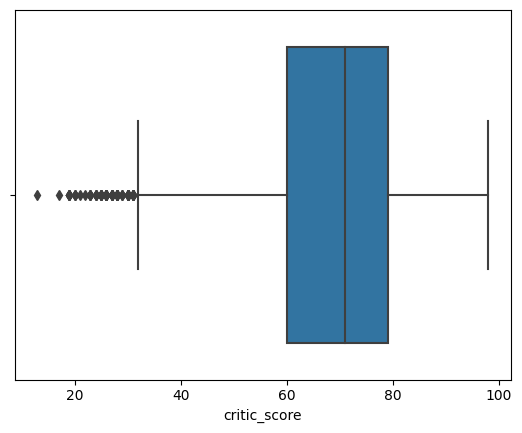

In [16]:
#Hacemos gráfica de bigote para las calificaciones de críticos.
sns.boxplot(vg['critic_score'])

Determinación: Puesto que de acuerdo a la gráfica de bigotes nos muestra algunos valores extremos y observando la distribuciòn de NAN de la columna "critic_score" por año,plataforma y género, se ha optado por obtener las medianas por género para rellenar los datos ausentes ya que la mediana es menos sensible a los outliers y hacerlo por subcategorías puede ser más representativo.


In [17]:
#Primero calculamos la mediana para cada plataforma.
platform_mediana = vg.groupby('platform')['critic_score'].median()
print(platform_mediana)

platform
2600     NaN
3DO      NaN
3DS     68.0
DC      88.0
DS      66.0
GB       NaN
GBA     69.0
GC      70.0
GEN      NaN
GG       NaN
N64      NaN
NES      NaN
NG       NaN
PC      78.0
PCFX     NaN
PS      73.5
PS2     70.0
PS3     73.0
PS4     73.0
PSP     68.0
PSV     71.0
SAT      NaN
SCD      NaN
SNES     NaN
TG16     NaN
WS       NaN
Wii     65.0
WiiU    73.5
X360    71.0
XB      72.0
XOne    76.0
Name: critic_score, dtype: float64


In [18]:
#Hemos detectado un obstáculo para nuestros cálculos ya que hay varias plataformas que en su totalidad los datos son Nan lo cual resta precisión a este método. La solución es calcular mediana por año de lanzamiento ya que previamente observamos están mejor distribuidos los NaN.
#Calculamos la mediana de critic_score por año de lanzamiento.
year_critic_mediana = vg.groupby('year_of_release')['critic_score'].median()
print(year_critic_mediana)

year_of_release
1980     NaN
1981     NaN
1982     NaN
1983     NaN
1984     NaN
1985    59.0
1986     NaN
1987     NaN
1988    64.0
1989     NaN
1990     NaN
1991     NaN
1992    85.0
1993     NaN
1994    69.0
1995     NaN
1996    91.0
1997    85.0
1998    84.0
1999    80.0
2000    72.0
2001    73.0
2002    71.0
2003    71.0
2004    70.0
2005    70.0
2006    69.0
2007    68.0
2008    68.0
2009    69.0
2010    70.0
2011    70.0
2012    75.0
2013    75.0
2014    73.0
2015    74.0
2016    74.5
9999    70.0
Name: critic_score, dtype: float64


In [19]:
#Hemos descubierto otro obstáculo en el sentido de los registros por año. Dado lo observado acotaremos nuestros datos a un periodo de 20 años desde 1996 hasta 2016 para identificar tendencias y trabajar con ello.De acuerdo a nuestro caso y lo que buscamos esto deberían ser suficientes datos para una propuesta 2017.
vg_post96 = vg[vg['year_of_release'] >= 1996].reset_index(drop=True)
vg_post96.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


In [20]:
#Ya con las medianas calculadas para cada año para la columna de "critic_score", haremos lo mismo para "user_score"

In [21]:
#Se ha detectado que tendremos que convertir el Datatype de columna user_score a float.
vg_post96['user_score'].unique()

array(['8', '8.3', nan, '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
#Hemos detectado el valor 'tbd' en la columna de calificaciones por usuario. El conocimiento de la industria nos permite sugerir que las siglas significan 'To be determined' es decir el juego no ha recibido una calificación por parte de los usuarios por lo que sustituiremos esos valores por NaN y luego convertiremos toda la columna a float.
vg_post96['user_score'] = pd.to_numeric(vg_post96['user_score'], errors='coerce')
vg_post96['user_score'] = vg_post96['user_score'].astype('float')
vg_post96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16008 non-null  object  
 1   platform         16008 non-null  category
 2   year_of_release  16008 non-null  int64   
 3   genre            16008 non-null  category
 4   na_sales         16008 non-null  float64 
 5   eu_sales         16008 non-null  float64 
 6   jp_sales         16008 non-null  float64 
 7   other_sales      16008 non-null  float64 
 8   critic_score     8133 non-null   float64 
 9   user_score       7586 non-null   float64 
 10  rating           9944 non-null   object  
dtypes: category(2), float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In [23]:
#Ahora sí calculamos la mediana para user_score de acuerdo al año.
year_user_mediana = vg_post96.groupby('year_of_release')['user_score'].median()
print(year_user_mediana)

year_of_release
1996    8.65
1997    8.30
1998    8.60
1999    8.80
2000    7.90
2001    8.00
2002    7.90
2003    8.20
2004    8.10
2005    7.80
2006    7.50
2007    7.20
2008    7.30
2009    7.30
2010    7.20
2011    6.90
2012    7.10
2013    6.80
2014    7.00
2015    7.10
2016    7.00
9999    7.40
Name: user_score, dtype: float64


Relleno de ausentes
Ya con las medianas calculadas por año tanto para las columnas critic como user, ahora crearemos una función que nos permita rellenar dichos valores ausentes por la mediana correspondiente según el año.

In [24]:
def relleno_mediana(fila):
    if pd.isna(fila['critic_score']):
        fila['critic_score'] = year_critic_mediana.get(fila['year_of_release'], fila['critic_score'])
    if pd.isna(fila['user_score']):
        fila['user_score'] = year_user_mediana.get(fila['year_of_release'], fila['user_score'])
    
    return fila

vg_post96 = vg_post96.apply(relleno_mediana, axis=1)
vg_post96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16008 non-null  object 
 1   platform         16008 non-null  object 
 2   year_of_release  16008 non-null  int64  
 3   genre            16008 non-null  object 
 4   na_sales         16008 non-null  float64
 5   eu_sales         16008 non-null  float64
 6   jp_sales         16008 non-null  float64
 7   other_sales      16008 non-null  float64
 8   critic_score     16008 non-null  float64
 9   user_score       16008 non-null  float64
 10  rating           9944 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [25]:
#Por alguna razòn nuestras columnas de platform y genre se reconvirtieron a object por lo que las reconvertimos a category. Ahora también convertiremos la columna rating.
vg_post96[['platform','genre','rating']] = vg_post96[['platform','genre','rating']].astype('category')
vg_post96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16008 non-null  object  
 1   platform         16008 non-null  category
 2   year_of_release  16008 non-null  int64   
 3   genre            16008 non-null  category
 4   na_sales         16008 non-null  float64 
 5   eu_sales         16008 non-null  float64 
 6   jp_sales         16008 non-null  float64 
 7   other_sales      16008 non-null  float64 
 8   critic_score     16008 non-null  float64 
 9   user_score       16008 non-null  float64 
 10  rating           9944 non-null   category
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [26]:
vg_post96['rating'].unique()
#La columna de rating la podemos dejar con los NaN ya que solo indica la clasificación por parte de la ESRB.

['E', NaN, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (8, object): ['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

Agregado de columnas
Ahora que hemos acotado nuestros datos a los que consideramos importantes (1996-2006) y que hemos rellenado los valores ausentes y convertido a Dtype categorías, calcularemos ventas totales para cada juego y agregaremos la columna.

In [27]:
#Crearemos la columna total_sales que buscaremos pueda ser insertada despues de la columna other_sales:
vg_post96['total_sales'] = vg_post96['na_sales'] + vg_post96['eu_sales'] + vg_post96['jp_sales'] + vg_post96['other_sales']

vg_post96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16008 non-null  object  
 1   platform         16008 non-null  category
 2   year_of_release  16008 non-null  int64   
 3   genre            16008 non-null  category
 4   na_sales         16008 non-null  float64 
 5   eu_sales         16008 non-null  float64 
 6   jp_sales         16008 non-null  float64 
 7   other_sales      16008 non-null  float64 
 8   critic_score     16008 non-null  float64 
 9   user_score       16008 non-null  float64 
 10  rating           9944 non-null   category
 11  total_sales      16008 non-null  float64 
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 1.1+ MB


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
La creación de la columna <code>total_sales</code> fue implementada correctamente, y la decisión de reubicarla para mejorar la legibilidad demuestra una atención al detalle. </div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Aunque justificaste la agregación de columnas de ventas, sería ideal calcular también el porcentaje de ventas por región para complementar tu análisis. Esto podría ayudar a identificar qué región domina las ventas totales.</div>


In [28]:
# Para mejor lectura moveremos la columna total_sales despues de other_sales.
columns = vg_post96.columns.tolist()
columns.insert(columns.index('other_sales') + 1, columns.pop(columns.index('total_sales'))) #Este recurso lo tuve que buscar en internet.

vg_post96 = vg_post96[columns]

vg_post96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16008 entries, 0 to 16007
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16008 non-null  object  
 1   platform         16008 non-null  category
 2   year_of_release  16008 non-null  int64   
 3   genre            16008 non-null  category
 4   na_sales         16008 non-null  float64 
 5   eu_sales         16008 non-null  float64 
 6   jp_sales         16008 non-null  float64 
 7   other_sales      16008 non-null  float64 
 8   total_sales      16008 non-null  float64 
 9   critic_score     16008 non-null  float64 
 10  user_score       16008 non-null  float64 
 11  rating           9944 non-null   category
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 1.1+ MB


In [29]:
vg_post96.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.00,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.30,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.00,E
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,91.0,8.65,NaN
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.50,E


## Paso 3 Análisis de datos

year_of_release
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
9999     269
Name: name, dtype: int64


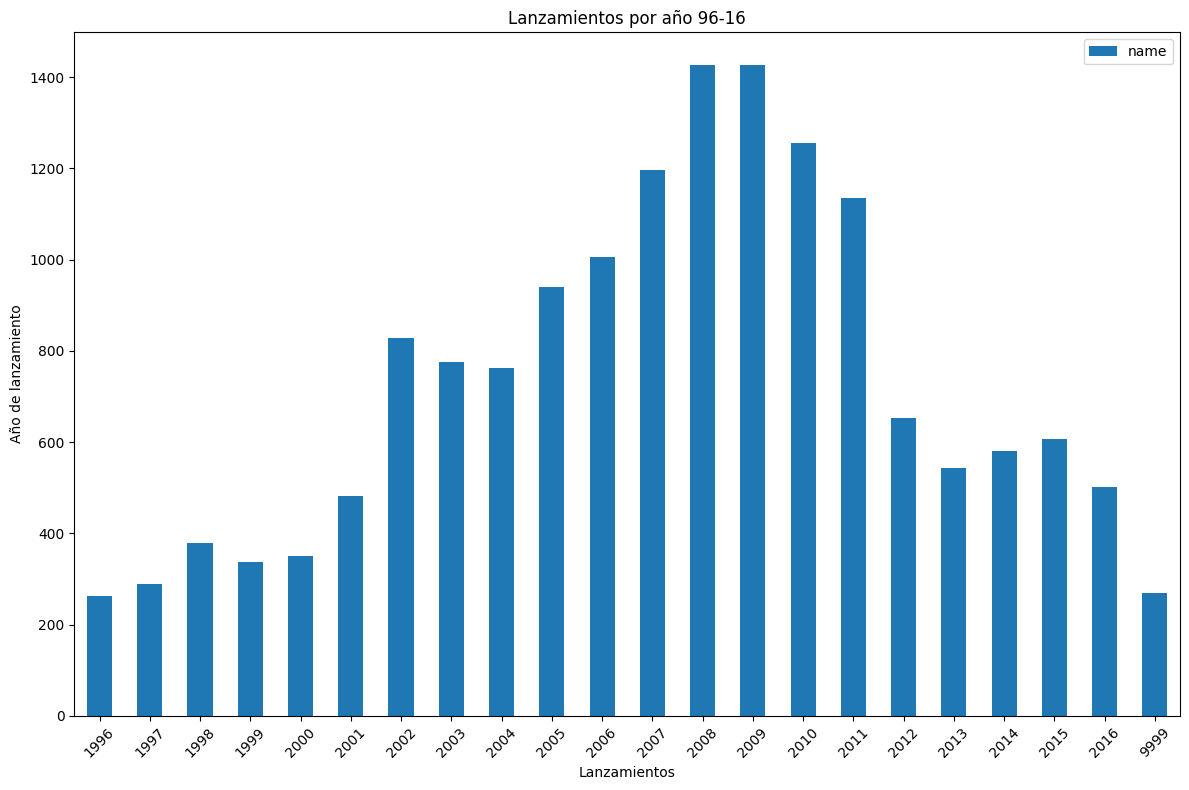

In [30]:
# Pars continuar trabajando de manera más simple y con una copia de seguridad del DT,haremos una copia del DT con el cual seguiremos trabajando.
vgames = vg_post96.copy()
lanza_year = vgames.groupby(['year_of_release'])['name'].count()
print(lanza_year)
#Graficamos los datos para observar visualmente.
lanza_year.plot(kind='bar',figsize=(12, 8),title='Lanzamientos por año 96-16',xlabel='Lanzamientos', ylabel='Año de lanzamiento',legend=True, rot=45)
plt.tight_layout()
plt.show()

Podemos observar que hay periodos de incremento de lanzamientos de juegos aproximadamente en 2002, 2005 y 2007. De 2011 a 2012 hay un fuerte descenso en el lanzamiento de títulos. Probablemente tengan correlación con las distintas generaciones de hardware de las consolas.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       688.87
GBA      317.85
PS4      314.14
PSP      294.05
3DS      259.00
XB       257.74
PC       239.33
N64      218.68
GC       198.93
XOne     159.32
GB       137.33
WiiU      82.19
PSV       54.07
SAT       18.37
SNES      17.39
DC        15.95
2600      10.50
WS         1.42
NG         0.10
PCFX       0.03
Name: total_sales, dtype: float64


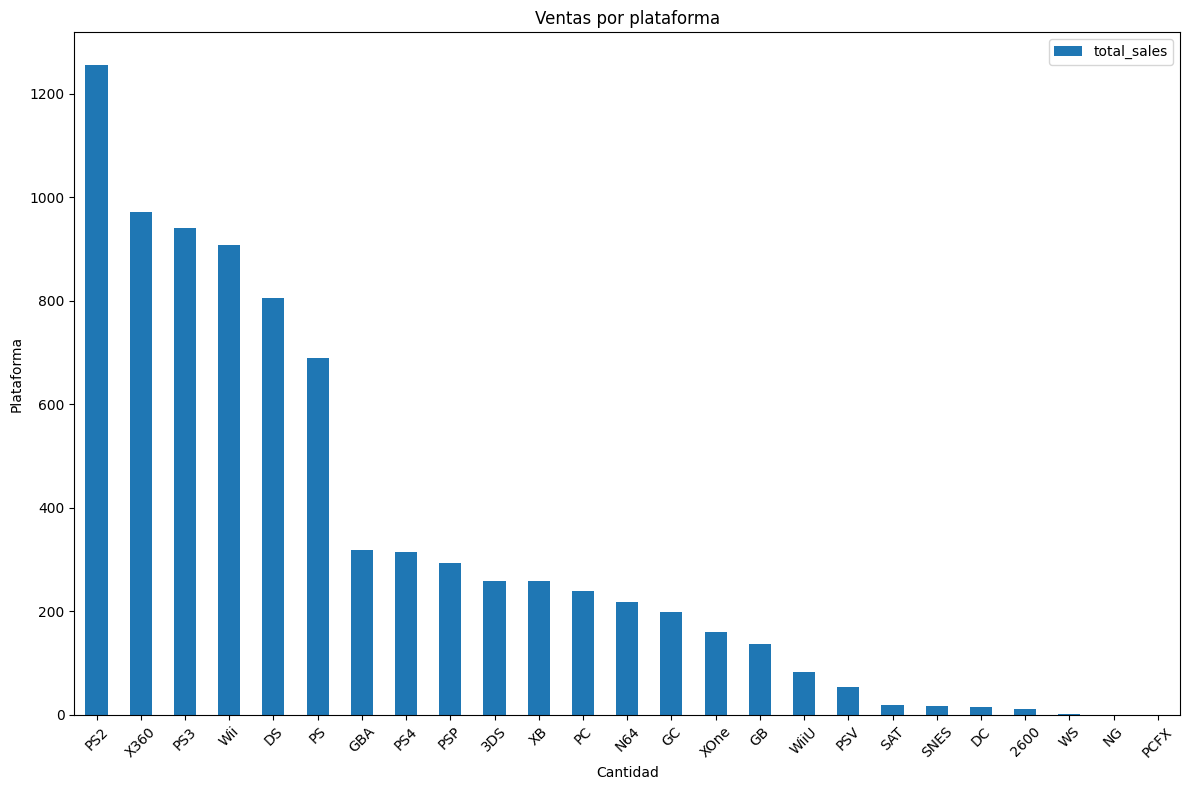

In [31]:
#Procedemos a identificar y graficar las plataformas más populares por ventas.
sales_by_plat = vgames.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_plat)
#Graficamos los datos por plataforma para observar visualmente.
sales_by_plat.plot(kind='bar',figsize=(12, 8),title='Ventas por plataforma',xlabel='Cantidad', ylabel='Plataforma',legend=True, rot=45)
plt.tight_layout()
plt.show()

In [32]:
#Ahora trataremos de determinar las plataformas con las mayores ventas totales y construir distribuciones basadas en los datos de cada año.
top_plat_byyear = vgames.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index 
print(top_plat_byyear)

<bound method Series.reset_index of platform  year_of_release
2600      1996                0.00
          1997                0.00
          1998                0.00
          1999                0.00
          2000                0.00
                             ...  
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
          9999                0.00
Name: total_sales, Length: 550, dtype: float64>


In [33]:
#Ya hemos obtenido los datos que queremos sin embargo para mostrar una gráfica de dispersión que muestre la evolución en el tiempo de las ventas por plataforma haremos una tabla pivote para despues graficar con mayor facilidad.
top_plat_byyear = vgames.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

# Ordenamos las columnas en orden cronológico...función que tuvimos que corregir mediante iteraciones y consultas en internet.
top_plat_byyear = top_plat_byyear.sort_index(axis=1)
print(top_plat_byyear)

year_of_release   1996    1997    1998    1999   2000    2001    2002    2003  \
platform                                                                        
2600              0.00    0.00    0.00    0.00   0.00    0.00    0.00    0.00   
3DS               0.00    0.00    0.00    0.00   0.00    0.00    0.00    0.00   
DC                0.00    0.00    3.38    5.16   5.99    1.07    0.29    0.00   
DS                0.00    0.00    0.00    0.00   0.00    0.00    0.00    0.00   
GB               36.03    6.37   26.90   38.00  19.76    9.24    0.00    0.00   
GBA               0.00    0.00    0.00    0.00   0.07   61.53   74.16   56.67   
GC                0.00    0.00    0.00    0.00   0.00   26.34   51.81   50.61   
N64              34.10   39.50   49.24   57.87  33.97    3.25    0.08    0.00   
NG                0.10    0.00    0.00    0.00   0.00    0.00    0.00    0.00   
PC               10.58   11.27    3.26    4.74   4.66    5.47    8.57    8.84   
PCFX              0.03    0.

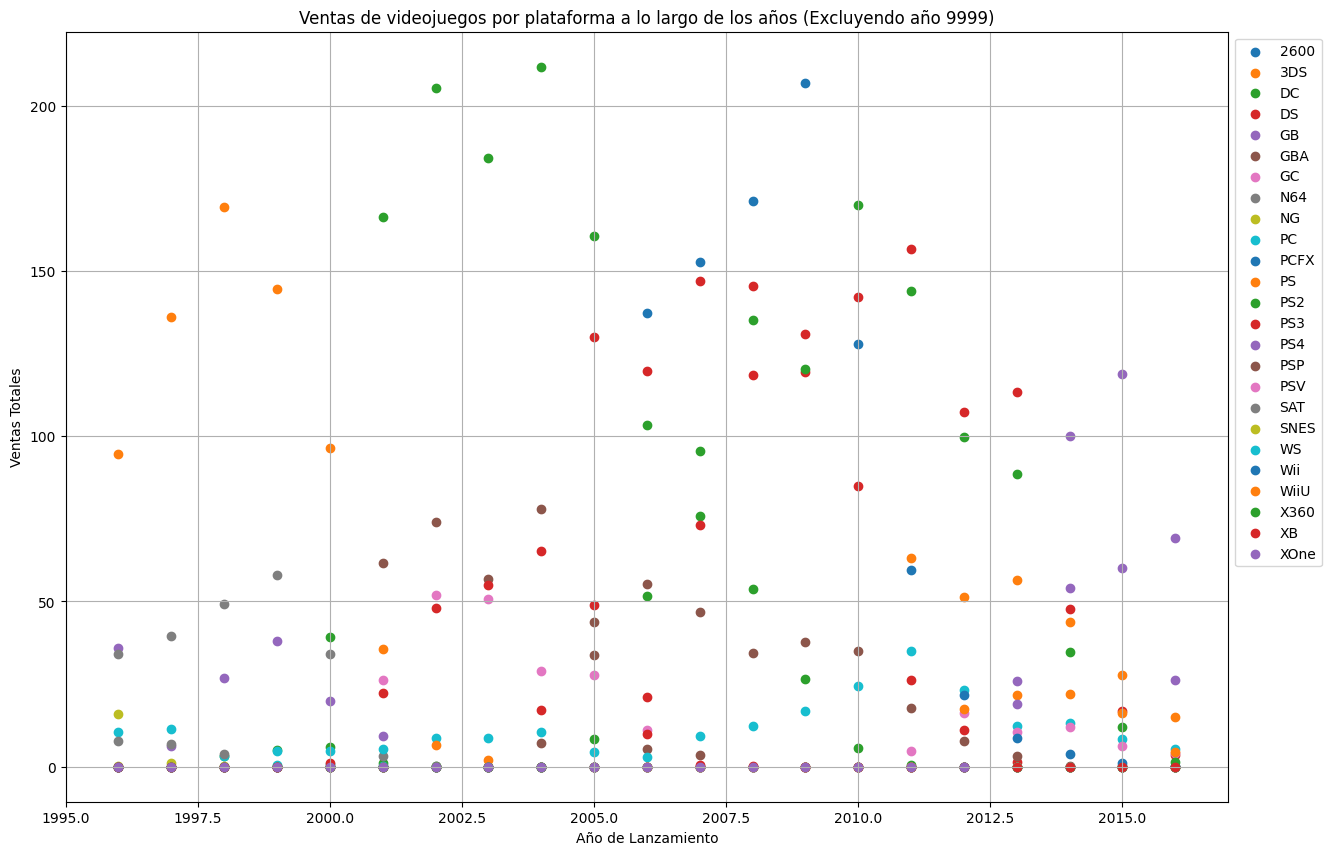

In [34]:
# Crear el gráfico de dispersión.
plt.figure(figsize=(15, 10))

for platform in top_plat_byyear.index:
    
    sales_by_year = top_plat_byyear.loc[platform]
    sales_by_year = sales_by_year[sales_by_year.index != 9999]  # Quitamos el año 9999 porque en una iteración original afectaba la escala/visualizaciòn correcta del gráfico
    
    # Tuvimos que acotar solo a los años donde hay valores de ventas mediante un filtro.
    years = sales_by_year.index
    sales = sales_by_year.values
    
    plt.scatter(years, sales, label=platform)

plt.title("Ventas de videojuegos por plataforma a lo largo de los años (Excluyendo año 9999)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
La gráfica de dispersión (Celda [34]) tiene demasiadas plataformas, lo cual dificulta la interpretación. Considera limitar las plataformas visualizadas a las 5-10 principales, para destacar patrones clave.</div>

Si bien tenemos un gráfico de dispersión se considera que no facilita un buen entendimiento del desempeño de ventas, procedemos a generar el mismo gráfico con líneas y marcando los puntos de inflexión.

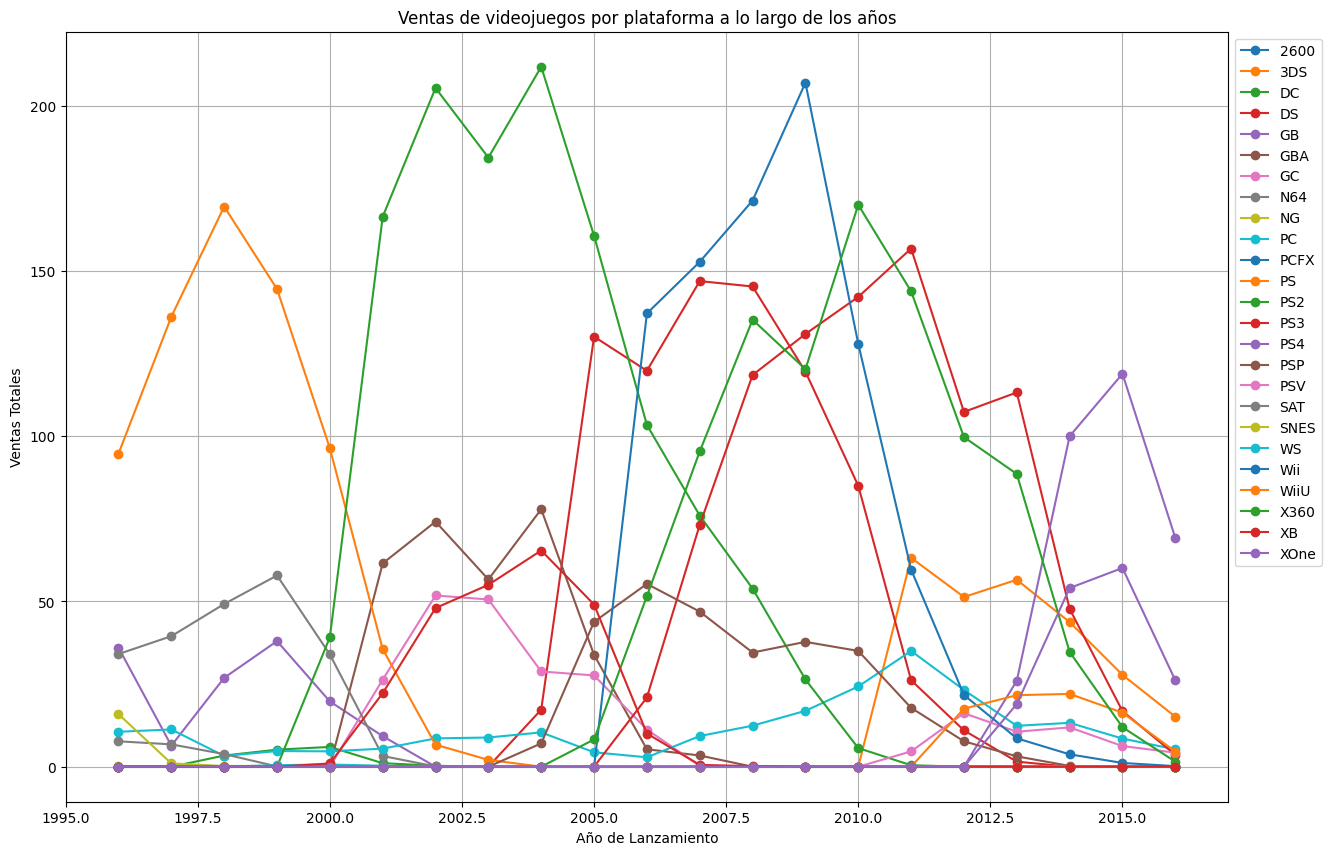

In [35]:
# Crear el gráfico de líneas
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura

# Itera sobre cada plataforma
for platform in top_plat_byyear.index:
    # Obtiene las ventas por año para la plataforma actual, excluyendo el año 9999
    sales_by_year = top_plat_byyear.loc[platform]
    sales_by_year = sales_by_year[sales_by_year.index != 9999]  # Filtra el año 9999
    
    # Filtra solo los años donde hay ventas no nulas
    years = sales_by_year.index
    sales = sales_by_year.values
    
    # Graficar las ventas con líneas para esta plataforma
    plt.plot(years, sales, label=platform, marker='o')  # Agrega marcador 'o' para destacar los puntos

# Añadir título y etiquetas de ejes
plt.title("Ventas de videojuegos por plataforma a lo largo de los años")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales")

# Añadir una leyenda para identificar cada plataforma
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar el gráfico
plt.show()

#Las gráficas considero muy avanzadas, se tuvo que consultar mucho fuentes externas para generarse.
Con estaS gráfica podemos obtener ciertas conclusiones y determinar que cuales plataformas han logrado mayores ventas y en qué periodos aproximados:
-Hay 6 plataformas que han logrado distinguirse por volumen de ventas. Aquí sus mejores periodos:
Playstation (95-2002)
Playstation 2 (2000-2008)
Nintendo DS (2004-2011)
Nintendo Wii (2006-2012)
X360 (2005-2015)
Playstation 3 (2006-2015)

Por otro lado vemos las plataformas con mayores ventas más recientes:
PS4, XOne y WiiU

Otra dato es que hasta el moment podemos observar que tradicionalmente las plataformas tardaban unos 4 a 6 años en alcanzar su pico de ventas. Y al momento de los datos pareciera que las plataformas actuales lo hacen en mucho menos tiempo alrededor de 3 años además de que no alcanzan los topes de ventas que plataformas anteriores.



platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
XB        0.00
WS        0.00
SNES      0.00
SAT       0.00
2600      0.00
PS        0.00
PCFX      0.00
NG        0.00
N64       0.00
GC        0.00
GBA       0.00
GB        0.00
DC        0.00
PS2       0.00
Name: total_sales, dtype: float64


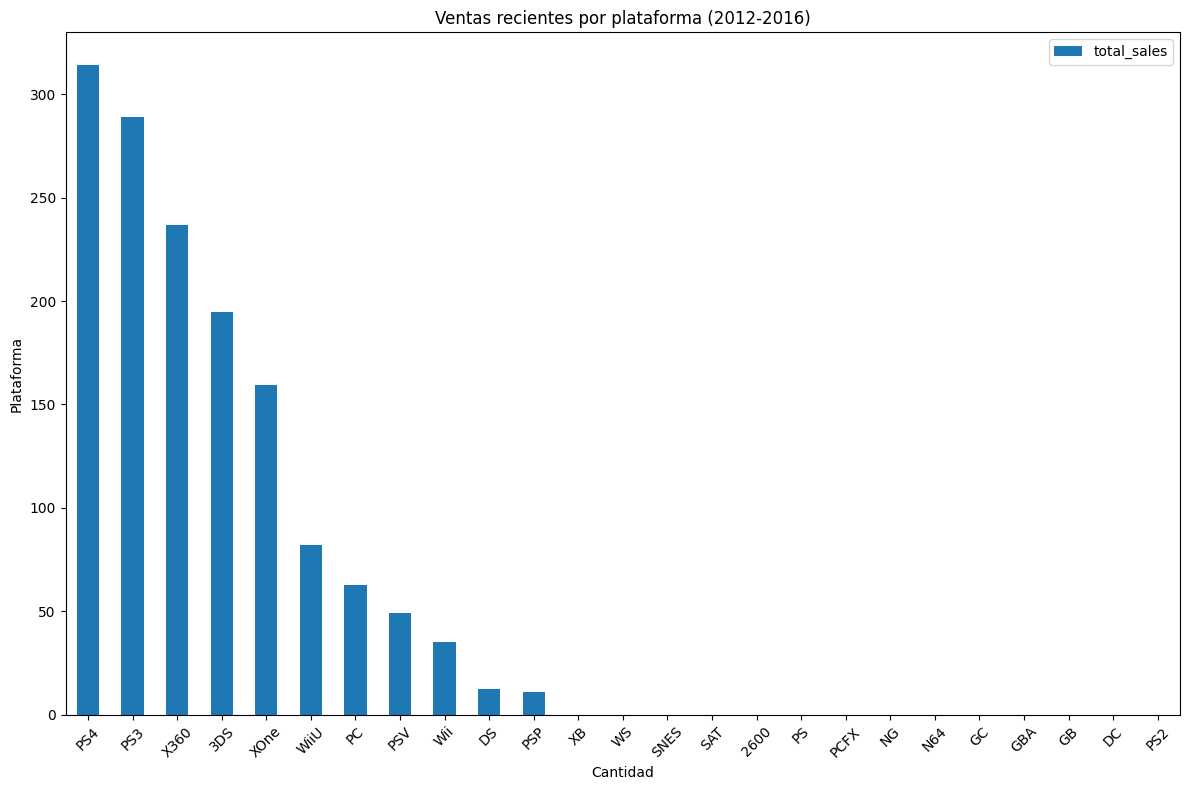

In [36]:
#Procedemos a identificar y graficar las plataformas más populares por ventas recientes.
vgames_recent = vgames[vgames['year_of_release'].between(2012, 2016)]
recent_plat = vgames_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(recent_plat)
recent_plat.plot(kind='bar',figsize=(12, 8),title='Ventas recientes por plataforma (2012-2016)',xlabel='Cantidad', ylabel='Plataforma',legend=True, rot=45)
plt.tight_layout()
plt.show()

Ahora analizaremos otras características de nuestros datos como los promedios y diagramas de caja para visualizar sus características.

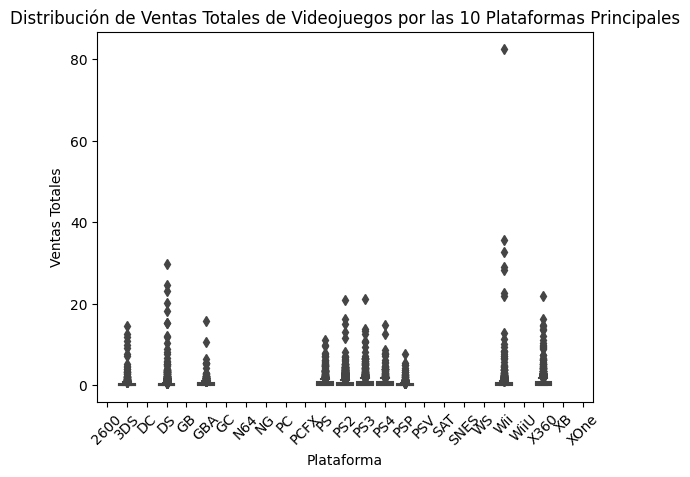

In [37]:
# Referimos a nuestros datos anteriores para filtrar a las 10 plataformas con mayores ventas.
top_10_platforms = vgames.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index #Este truco de head(10).index tambièn se tuvo que consultar.

top_10_data = vgames[vgames['platform'].isin(top_10_platforms)]

# Hacemos el diagrama de caja para las 10 plataformas principales:
sns.boxplot(data=top_10_data, x='platform', y='total_sales')

plt.title("Distribución de Ventas Totales de Videojuegos por las 10 Plataformas Principales")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Generaste visualizaciones claras para analizar lanzamientos por año, ventas por plataforma y la evolución de las ventas en el tiempo. Las gráficas de líneas y dispersión muestran un nivel avanzado de visualización.</div>


Con esta gráfica pordemos observar aquellas plataformas con mayor numero de outliers. Quiere decir que varios juegos tienen un comportamiento de ventas excepcional.

In [38]:
mean_sales = vgames.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(mean_sales)

platform
GB      2.251311
PS4     0.801378
X360    0.769746
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.637253
2600    0.617647
PS2     0.581106
WiiU    0.559116
3DS     0.498077
SNES    0.470000
GBA     0.386679
DS      0.374930
GC      0.357788
XB      0.312791
DC      0.306731
PC      0.249562
PSP     0.243218
WS      0.236667
SAT     0.180098
PSV     0.125744
NG      0.050000
PCFX    0.030000
Name: total_sales, dtype: float64


Si bien los promedios de venta por plataforma coinciden con algunos de los que sabemos son los de mayores ventas, también vemos el sesgo de este cálculo al obtener puntajes altos en plataformas obsoletas además del sesgo por datos extremos.

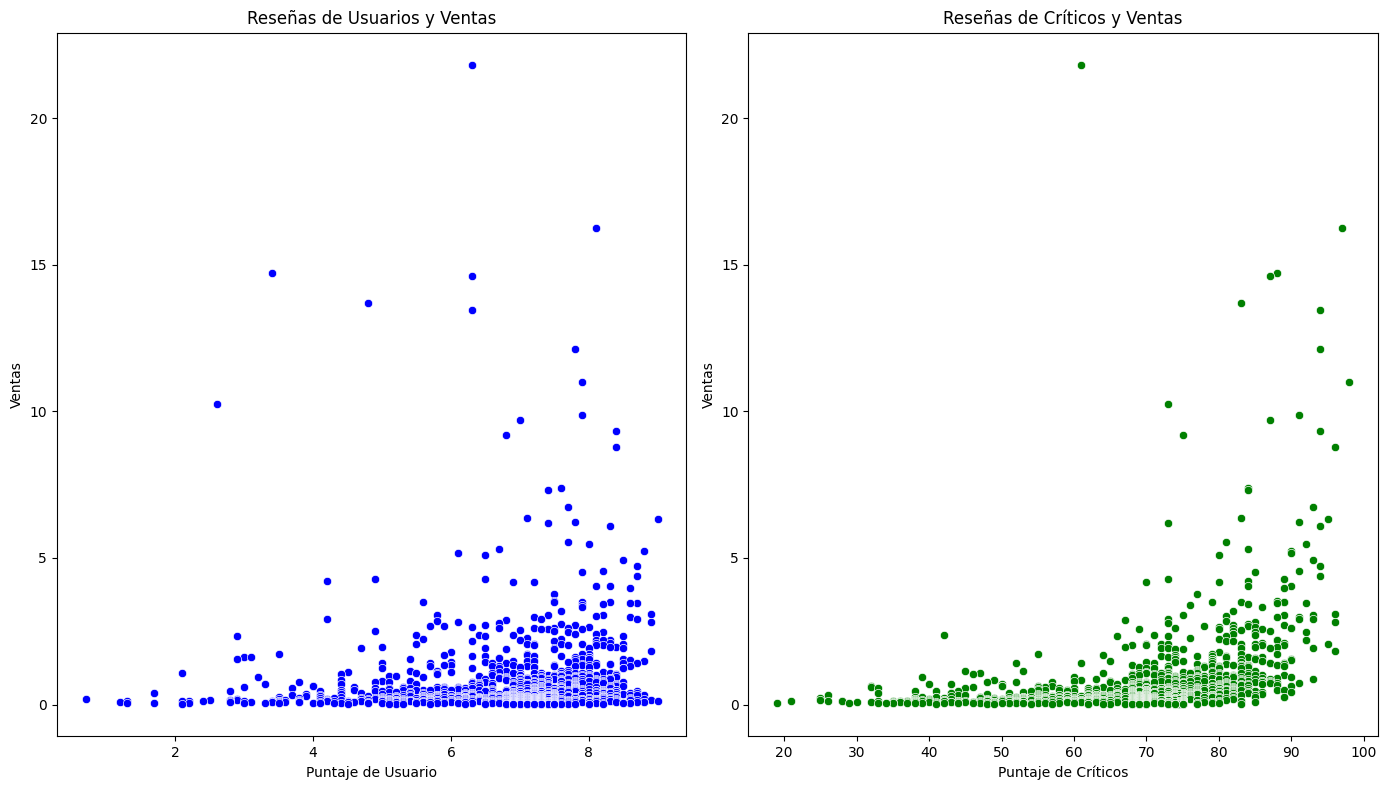

In [39]:
#Analizaremos el impacto de reseñas en las ventas de X360 con gráficos de dispersión y calculando la correlación entre las reseñas y las ventas.
X360_data = vgames[vgames['platform'] == 'X360']

plt.figure(figsize=(14, 8))

# user_score
plt.subplot(1, 2, 1) #Este truco tambièn lo consulté para poder mostrar los gráficos.
sns.scatterplot(data=X360_data, x='user_score', y='total_sales', color='blue')
plt.title('Reseñas de Usuarios y Ventas')
plt.xlabel('Puntaje de Usuario')
plt.ylabel('Ventas')

# critic_score
plt.subplot(1, 2, 2)
sns.scatterplot(data=X360_data, x='critic_score', y='total_sales', color='green')
plt.title('Reseñas de Críticos y Ventas')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas')

plt.tight_layout()
plt.show()

In [40]:
#Calcularemos la correlación de entre las ventas y las reseñas por usuarios y críticos.

user_corr = X360_data['user_score'].corr(X360_data['total_sales'])
critic_corr = X360_data['critic_score'].corr(X360_data['total_sales'])

print("La correlación para las reseñas de usuarios con ventas es:", user_corr)
print("La correlación para las reseñas de críticos con ventas es:", critic_corr)

La correlación para las reseñas de usuarios con ventas es: 0.08098679235033586
La correlación para las reseñas de críticos con ventas es: 0.3616441980081931


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Realizaste un análisis interesante de correlación entre puntuaciones y ventas. Identificar que las reseñas de críticos tienen más impacto que las de usuarios es un hallazgo relevante.</div>


Podemos observar que existe un correlación positiva ligera para el caso de las reseñas de los críticos siendo aquellos títulos que califican mejor las que logran un poco más de ventas. Si bien los usuario también hay una correlación positiva, es mucho menor, aunque también implica que los usuarios están más abiertos a adquirir juegos que no necesariamente son aquellos que las mejores calificaciones.
Analizaremos los 5 mejores juegos vendidos de X360 que también esten disponibles en otra plataforma para comparar las ventas.

In [41]:
#Ubicamos de los datos de X360 los 5 títulos más vendidos, que también estén disponibles en otra plataforma utilizando la variable predefinida de los datos de X360.

multi_plat = vgames['name'].value_counts()[vgames['name'].value_counts() > 1].index #Este código lo tuve que consultar mucho porque no me estaba dando en mis iteraciones previas.
x_multi = X360_data[X360_data['name'].isin(multi_plat)]

# Ordena por ventas totales en orden descendente y selecciona los 5 primeros
top_5_multi = x_multi.sort_values(by='total_sales', ascending=False).head(5)

# Mostrar el resultado
print(top_5_multi[['name', 'platform', 'total_sales']])

                              name platform  total_sales
17              Grand Theft Auto V     X360        16.27
23  Call of Duty: Modern Warfare 3     X360        14.73
26         Call of Duty: Black Ops     X360        14.62
29      Call of Duty: Black Ops II     X360        13.68
30  Call of Duty: Modern Warfare 2     X360        13.47


In [42]:
#Ahora que hemos identificado los tìtulos especìficos podemos crear una lista para mostrar las ventas en las otras plataformas:
titles = ["Grand Theft Auto V","Call of Duty: Modern Warfare 3","Call of Duty: Black Ops","Call of Duty: Black Ops II","Call of Duty: Modern Warfare 2"]

# Se filtra el DataFrame para obtener estos títulos específicos en sus distintas plataformas
platform_sales = vgames[vgames['name'].isin(titles)]

# Obtenemos las ventas por plataforma
title_sales = platform_sales.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Se agregò en otra iteraciòn este filtro para excluir las que no tuvieron ventas
title_sales = title_sales[title_sales['total_sales'] > 0]

# Reordenamos para visualizar mejor
title_sales = title_sales.sort_values(by=['name', 'total_sales'], ascending=[True, False]) #También lo consulté para asignar valores booleanos a cada columna.

print(title_sales)

                               name platform  total_sales
22          Call of Duty: Black Ops     X360        14.62
13          Call of Duty: Black Ops      PS3        12.63
9           Call of Duty: Black Ops       PC         1.62
20          Call of Duty: Black Ops      Wii         1.37
3           Call of Duty: Black Ops       DS         0.58
38       Call of Duty: Black Ops II      PS3        13.79
47       Call of Duty: Black Ops II     X360        13.68
34       Call of Duty: Black Ops II       PC         1.52
46       Call of Duty: Black Ops II     WiiU         0.41
72   Call of Duty: Modern Warfare 2     X360        13.47
63   Call of Duty: Modern Warfare 2      PS3        10.61
59   Call of Duty: Modern Warfare 2       PC         0.89
97   Call of Duty: Modern Warfare 3     X360        14.73
88   Call of Duty: Modern Warfare 3      PS3        13.33
84   Call of Duty: Modern Warfare 3       PC         1.71
95   Call of Duty: Modern Warfare 3      Wii         0.83
113           

Podemos observar que en los tìtulos màs vendidos de X360 que ademàs fueron multiplataforma, hubo férrea competencia con PS3. Podemos observar que el caso de Grand Theft Auto V es atípico por su logevidad y por ende disponiblidad en varias plataformas multigeneraciòn, lo cual coincide en que es el producto cultural más vendido de la humanidad.
Echaremos un vistazo a los géneros de los títulos, para poder determinar cómo impacta en las ventas de los mismos.

In [43]:
genre_sales= vgames.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          1669.14
Sports          1271.94
Shooter          974.88
Role-Playing     877.68
Misc             779.49
Racing           691.50
Platform         597.36
Fighting         392.60
Simulation       376.96
Adventure        213.80
Strategy         162.00
Puzzle           158.36
Name: total_sales, dtype: float64


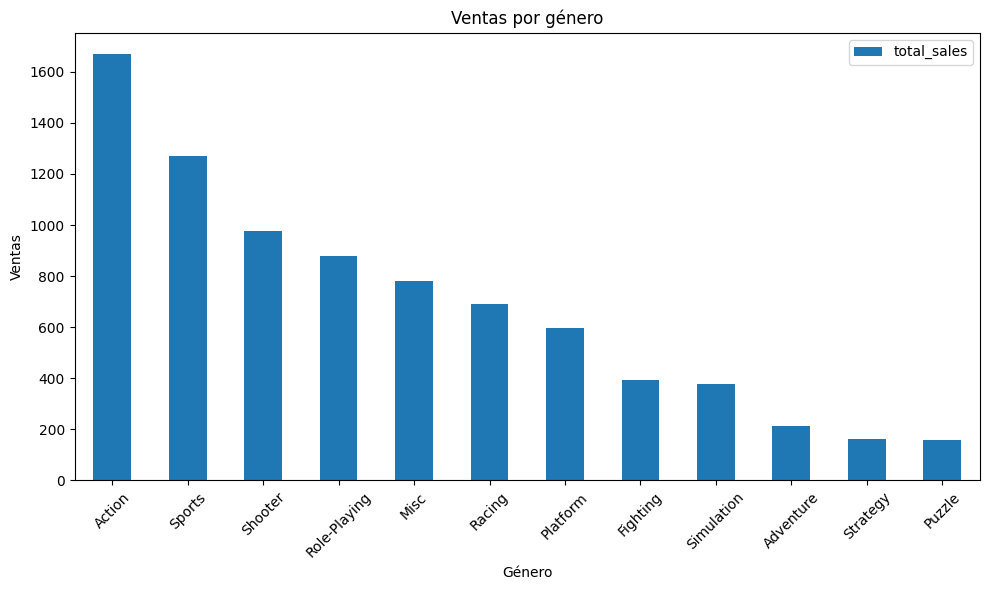

In [44]:
#Procedemos a graficarlo
genre_sales.plot(kind='bar',figsize=(10, 6),title='Ventas por género',x='genre',y='total_sales',xlabel='Género',ylabel='Ventas',legend=True, rot=45)
plt.tight_layout()
plt.show()

Podemos observar que los títulos más vendidos son los de acción, deportes y shooter, seguido por RPG's y Misceláneos. Si bien es un buen dato a observar no podemos descartar que lo mismo se deba a que precisamente se lanzan más títulos en esas categorías por lo cual un mayor análisis podría calcular una especie de rentabilidad de cada título dividiendo las ventas entre la cantidad de títulos.

## Paso 4. Perfiles regionales.

In [45]:
#Para cada región obtenemos las 5 plataformas principales.
#Describe las variaciones en sus cuotas de mercado de una región a otra.#
#Los cinco géneros principales. Explica la diferencia.
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

region_na = vgames.groupby('platform')['na_sales'].sum()
top_na= region_na.sort_values(ascending=False).head(5)
print('Las principales plataformas para Norteamerica son:',top_na)
print()
region_eu = vgames.groupby('platform')['eu_sales'].sum()
top_eu= region_eu.sort_values(ascending=False).head(5)
print('Las principales plataformas para Europa son:',top_eu)
print()
region_jp = vgames.groupby('platform')['jp_sales'].sum()
top_jp= region_jp.sort_values(ascending=False).head(5)
print('Las principales plataformas para Japón son:',top_jp)




Las principales plataformas para Norteamerica son: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Las principales plataformas para Europa son: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      202.56
Name: eu_sales, dtype: float64

Las principales plataformas para Japón son: platform
DS     175.55
PS2    139.20
PS     127.61
3DS    100.67
PS3     80.19
Name: jp_sales, dtype: float64


In [46]:
# Al cacularlo de la forma anterior hemos detectado un obstáculo en el sentido que las 5 plataformas más vendidas entre cada región quizá no coincidan.
#Por lo anterior hacemos un filtrado para solo considerar las 5 plataformas más vendidas con ventas en las 3 regiones distintas. 
top_5_platforms = (vgames[(vgames['na_sales'] > 0) & (vgames['eu_sales'] > 0) & (vgames['jp_sales'] > 0)]
.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum())  #Tuve que consultar esto por la complejidad que fui agregando y aumenta la probabilidad de errores.
top_5_platforms = top_5_platforms.sum(axis=1).sort_values(ascending=False).head(5)

print(top_5_platforms)


platform
PS3     566.46
X360    529.44
PS2     474.49
Wii     444.00
DS      372.47
dtype: float64


In [50]:
#Para facilitar los cálculos de cuota de mercado y varianza entre regiones, crearemos un Df.
datos_cuota = {
    'Platform': ['PS3','X360','PS2','Wii','DS'],
    'sales':[566.46,529.44,474.49,444.00,372.47]
}

vgamesmarket = pd.DataFrame(datos_cuota)
print(vgamesmarket)


  Platform   sales
0      PS3  566.46
1     X360  529.44
2      PS2  474.49
3      Wii  444.00
4       DS  372.47


In [51]:
#Creamos una pequeña función para calcular la cuota de mercado por plataforma de los top 5 para la región:

def cuotamerc(row):
    totalsales = vgamesmarket['sales'].sum()
    cuota = []
    return (row['sales']*100)/totalsales

#Este tuve que buscarlo , aunque sencillo es elegante porque se aplica la función al mismo tiempo que se agrega la columna.
vgamesmarket['Cuota en %'] = vgamesmarket.apply(cuotamerc, axis=1)

vgamesmarket.head()

,Platform,sales,Cuota en %
0,PS3,566.46,23.732435
1,X360,529.44,22.181443
2,PS2,474.49,19.879256
3,Wii,444.00,18.601845
4,DS,372.47,15.605021


In [58]:
PS3_na = vgames[vgames['platform'] == 'PS3']['na_sales'].sum()
X360_na = vgames[vgames['platform'] == 'X360']['na_sales'].sum()
PS2_na = vgames[vgames['platform'] == 'PS2']['na_sales'].sum()
Wii_na = vgames[vgames['platform'] == 'Wii']['na_sales'].sum()
DS_na = vgames[vgames['platform'] == 'DS']['na_sales'].sum()
all_na = PS3_na,X360_na,PS2_na,Wii_na,DS_na
print(all_na)
print()
PS3_eu = vgames[vgames['platform'] == 'PS3']['eu_sales'].sum()
X360_eu = vgames[vgames['platform'] == 'X360']['eu_sales'].sum()
PS2_eu = vgames[vgames['platform'] == 'PS2']['eu_sales'].sum()
Wii_eu = vgames[vgames['platform'] == 'Wii']['eu_sales'].sum()
DS_eu = vgames[vgames['platform'] == 'DS']['eu_sales'].sum()
all_eu = PS3_eu,X360_eu,PS2_eu,Wii_eu,DS_eu
print(all_eu)
print()
PS3_jp = vgames[vgames['platform'] == 'PS3']['jp_sales'].sum()
X360_jp = vgames[vgames['platform'] == 'X360']['jp_sales'].sum()
PS2_jp = vgames[vgames['platform'] == 'PS2']['jp_sales'].sum()
Wii_jp = vgames[vgames['platform'] == 'Wii']['jp_sales'].sum()
DS_jp = vgames[vgames['platform'] == 'DS']['jp_sales'].sum()
all_jp = PS3_jp,X360_jp,PS2_jp,Wii_jp,DS_jp
print(all_jp)
print()

(393.49, 602.47, 583.84, 496.9, 382.4)

(330.29, 270.76, 339.29, 262.21000000000004, 188.89000000000001)

(80.19, 12.430000000000001, 139.2, 69.33, 175.55)



In [61]:
#Ahora utilizando la cuota de mercado global como base podemos calcular la varianza por plataforma para cada regiòn regiones:
sales_PS3 = 566.46
na_PS3 = 393.49
eu_PS3 = 330.29
jp_PS3 = 80.19

# Variación na
variacion_na = ((na_PS3 - sales_PS3) / sales_PS3) * 100

# Variación eu
variacion_eu = ((eu_PS3 - sales_PS3) / sales_PS3) * 100

# Variación jp
variacion_jp = ((jp_PS3 - sales_PS3) / sales_PS3) * 100

print('Variación PS3')
print(variacion_na)
print(variacion_eu)
print(variacion_jp)
print()

#2 X360
sales_X360 = 529.44
na_X360 = 602.47
eu_X360 = 270.76
jp_X360 = 12.43

# Variación na
variacion_na = ((na_X360 - sales_X360) / sales_X360) * 100

# Variación eu
variacion_eu = ((eu_X360 - sales_X360) / sales_X360) * 100

# Variación jp
variacion_jp = ((jp_X360 - sales_X360) / sales_X360) * 100

print('Variación X360')
print(variacion_na)
print(variacion_eu)
print(variacion_jp)
print()

#3 PS2
sales_PS2 = 474.49
na_PS2 = 583.84
eu_PS2 =339.29
jp_PS2 = 139.2

# Variación na
variacion_na = ((na_PS2 - sales_PS2) / sales_PS2) * 100

# Variación eu
variacion_eu = ((eu_PS2 - sales_PS2) / sales_PS2) * 100

# Variación jp
variacion_jp = ((jp_PS2 - sales_PS2) / sales_PS2) * 100

print('Variación PS2')
print(variacion_na)
print(variacion_eu)
print(variacion_jp)
print()

#4 Wii
sales_Wii = 444.00
na_Wii = 496.9
eu_Wii = 262.21
jp_Wii = 69.33

# Variación na
variacion_na = ((na_Wii - sales_Wii) / sales_Wii) * 100

# Variación eu
variacion_eu = ((eu_Wii - sales_Wii) / sales_Wii) * 100

# Variación jp
variacion_jp = ((jp_Wii - sales_Wii) / sales_Wii) * 100

print('Variación Wii')
print(variacion_na)
print(variacion_eu)
print(variacion_jp)
print()

#5 DS
sales_DS = 372.47
na_DS = 382.4
eu_DS = 188.89
jp_DS = 175.55

# Variación na
variacion_na = ((na_DS - sales_DS) / sales_DS) * 100

# Variación eu
variacion_eu = ((eu_DS - sales_DS) / sales_DS) * 100

# Variación jp
variacion_jp = ((jp_DS - sales_DS) / sales_DS) * 100

print('Variación DS')
print(variacion_na)
print(variacion_eu)
print(variacion_jp)

Variación PS3
-30.535254033824106
-41.69226423754546
-85.84366062917064

Variación X360
13.793819885161673
-48.8591719552735
-97.65223632517377

Variación PS2
23.045796539442353
-28.493751185483358
-70.66323842441359

Variación Wii
11.91441441441441
-40.9436936936937
-84.38513513513513

Variación DS
2.6659865224044754
-49.287190914704546
-52.86868741106666


In [62]:
#Por último agregamos las columnas con los datos obtenidos:
vgamesmarket['Var NA']=[-30.53,13.79,23.04,11.91,2.66]
vgamesmarket['Var EU']=[-41.69,-48.85,-28.49,-40.94,-49.28]
vgamesmarket['Var JP']=[-85.84,-97.65,-70.66,-84.38,-52.86]

vgamesmarket.head()


,Platform,sales,Cuota en %,Var NA,Var EU,Var JP
0,PS3,566.46,23.732435,-30.53,-41.69,-85.84
1,X360,529.44,22.181443,13.79,-48.85,-97.65
2,PS2,474.49,19.879256,23.04,-28.49,-70.66
3,Wii,444.00,18.601845,11.91,-40.94,-84.38
4,DS,372.47,15.605021,2.66,-49.28,-52.86


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Identificaste diferencias clave entre regiones, y la creación de un DataFrame compacto para las cuotas de mercado es una excelente práctica. La tabla de variación regional aporta valor al análisis.</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
La varianza por región fue calculada tomando como base las ventas globales. Esto está bien, pero incluir una comparación directa entre regiones (NA vs JP, por ejemplo) podría revelar más patrones.</div>


#Este método no estoy seguro que sea práctica estándar, es decir hacer la comparación de varianza como base la venta global. En todo caso dependiendo de la estrategia se puede determinar cual es tu región de ventas "base" es decir es que utilizas como baseline a partir del cual haces tus comparaciones.
Podemos concluir que Japón representa la menor cantidad de ventas en todas las plataformas sin embargo el DS es el que mejor vendio pero aún así el DS vendió mejor en NA.
La tabla nos permite tener un concentrado de datos para obtener más inferencias.

In [70]:
#Analizaremos el impacto de la clasificación de ESRB en las ventas por región con gráficos de dispersión y calculando la correlación entre las clasificaciones y las ventas.
ESRB_na = vgames.groupby(['platform', 'rating'])['na_sales'].sum().sort_values(ascending=False)
ESRB_eu = vgames.groupby(['platform', 'rating'])['eu_sales'].sum().sort_values(ascending=False)
ESRB_jp = vgames.groupby(['platform', 'rating'])['jp_sales'].sum().sort_values(ascending=False)

print(ESRB_na)
print(ESRB_eu)
print(ESRB_jp)

platform  rating
Wii       E         276.74
X360      M         271.55
DS        E         226.10
PS2       E         206.09
          T         183.23
                     ...  
PC        AO          0.00
          RP          0.00
PCFX      AO          0.00
          E           0.00
PS2       K-A         0.00
Name: na_sales, Length: 200, dtype: float64
platform  rating
Wii       E         151.75
PS3       M         135.98
X360      M         122.80
PS2       E         116.03
DS        E         112.16
                     ...  
PC        AO          0.00
          EC          0.00
PCFX      AO          0.00
          E           0.00
PS2       K-A         0.00
Name: eu_sales, Length: 200, dtype: float64
platform  rating
DS        E         60.29
PS2       T         43.58
Wii       E         40.09
PS3       T         25.51
          M         24.77
                    ...  
PC        EC         0.00
          K-A        0.00
          RP         0.00
          T          0.00
PS2    

Podemos observar diferencias en las clasificaciones de ESRB más vendidas por región pero no podemos afirmar que el factor determinante sea la clasificaciòn ESRB. Requiere mayor investigación pero otra respuesta puede ser que dependiendo la plataforma es que aumenta o disminuye la cantidad de juegos para ciertas edades como por ejemplo Nintendo tiende a tener juegos para todas las edades, y Xbox llegó a hacer campaña de su plataforma como aquella para los de edad "madura".

# Paso 5. Prueba de hipótesis.

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Andrés, noté que ya incluiste una prueba \(t\) de Student en tu análisis para comparar las ventas promedio entre plataformas. ¡Bien hecho al incorporar este enfoque estadístico! Sin embargo, hay algunos puntos que podrías mejorar para fortalecer esta parte del trabajo:

1. **Explicación de hipótesis**: 
   Es importante que definas de manera explícita las hipótesis que estás evaluando. Por ejemplo:
   - \(H_0\): Las ventas promedio de las dos plataformas son iguales.
   - \(H_1\): Las ventas promedio de las dos plataformas son diferentes.

   Al incluir estas definiciones, ayudarás a los lectores a entender mejor el propósito de la prueba.

2. **Validación de supuestos**:
   Antes de realizar una prueba \(t\), es esencial verificar los supuestos de normalidad y homogeneidad de varianzas:
   - **Normalidad**: Usa el test de Shapiro-Wilk para confirmar que los datos siguen una distribución normal.
     ```python
     from scipy.stats import shapiro
     stat, p = shapiro(ps4_sales.dropna())
     print(f'Estadístico Shapiro: {stat}, p-valor: {p}')
     if p < 0.05:
         print("No sigue una distribución normal.")
     else:
         print("Sigue una distribución normal.")
     ```
   - **Homogeneidad de varianzas**: Usa el test de Levene para verificar si las varianzas entre los grupos son iguales.
     ```python
     from scipy.stats import levene
     stat, p = levene(ps4_sales, xbox_sales)
     print(f'Estadístico Levene: {stat}, p-valor: {p}')
     if p < 0.05:
         print("No se cumple la homogeneidad de varianzas.")
     else:
         print("Se cumple la homogeneidad de varianzas.")
     ```

   Si los supuestos no se cumplen, podrías optar por una versión alternativa de la prueba \(t\), como Welch, que ya usaste al establecer `equal_var=False`.

3. **Interpretación de resultados**:
   Aunque presentaste el \(p\)-valor, sería ideal explicar su significado en el contexto del problema. Por ejemplo:
   - Si \(p < 0.05\), puedes concluir que las diferencias en ventas promedio entre las plataformas son significativas.
   - Si \(p > 0.05\), no hay suficiente evidencia para afirmar que las ventas promedio son diferentes.

4. **Conclusión práctica**:
   Añadir una interpretación más concreta sobre cómo este resultado impacta el análisis general sería muy útil. Por ejemplo, podrías mencionar cuál plataforma parece ser más favorable en ventas promedio y si esto coincide con tus observaciones iniciales.

¡Excelente trabajo, Andrés! Estos pequeños ajustes harán que tu análisis sea más sólido y claro. 😊
</div>



Probaremos la hipótesis que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [73]:
# Prueba las hipótesis.
#En primera instancia obtenemos el promedio de calificaciones de usuarios para Xbox One y PC.
mean_XOne = vgames[vgames['platform'] == 'XOne']['user_score'].mean()
mean_PC = vgames[vgames['platform'] == 'PC']['user_score'].mean()
print(mean_XOne)
print(mean_PC)

#Si bien nos queda claro que los promedios son distintos para hacer las hipótesis estadísticas primero transformaremos los datos de cada plan a una Series, para despues utilizar la función donde conocemos las medias de dos poblaciones estadísticas, siendo la hipótesis nula que no hay mucha diferencia en promedio y la alternativa que sí la hay.
XOne_values = vgames[vgames['platform'] == 'XOne']['user_score']
PC_values = vgames[vgames['platform'] == 'PC']['user_score']

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(XOne_values, PC_values,equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

6.65587044534413
7.110844629822732
valor p:  4.4060870953772325e-07
Rechazamos la hipótesis nula


Hemos rechazado la hipótesis de que los promedios son similares por lo que se confirma que una plataforma tiene mejores reseñas que otra.

Probaremos la hipótesis de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, por lo que haremos algo similar al paso anterior.

Nuestra hipótesis nula es que no hay mucha diferencia en el planteamiento por lo que se confirma que son diferentes y la alternativa es que si la hay por lo que serian iguales.

In [74]:
# Prueba las hipótesis.
#En primera instancia obtenemos el promedio de calificaciones de usuarios para generos Acción y Deportes.
mean_accion = vgames[vgames['genre'] == 'Action']['user_score'].mean()
mean_deporte = vgames[vgames['genre'] == 'Sports']['user_score'].mean()
print(mean_accion)
print(mean_deporte)

accion_values = vgames[vgames['genre'] == 'Action']['user_score']
sports_values = vgames[vgames['genre'] == 'Sports']['user_score']

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(XOne_values, PC_values,equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

7.205967643467644
7.332474455797424
valor p:  4.4060870953772325e-07
Rechazamos la hipótesis nula


Hemos rechazado la hipótesis nula por lo que la alternativa es que los promedios son relativamente iguales. 
Esto lo podemos observar en los valores arrojados como promedios.

## Conclusión General

Como conclusión general podemos afirmar que existen, en algunos casos, fuertes diferencias entre las mejores ventas de tìtulos y plataforma por regiones. De acuerdo a nuestras gráficas y lo que podemos observar es que es muy importante poder conocer la industria y naturaleza de la industria de cuyos datos estamos analizando: la información contextual en conjunto con el analisis nos hace poder aportar mejores sugerencias. En el caso de una campaña de videojuegos para 2017 si bien podemos recomendar cuales son las plataformas con mayores ventas para las cuales recomendar la atención de dicha campaña podemos observar que incluso las de mayores ventas ya tuvieron su pico y van en caida, es decir las plataformas aquì analizadas van de salida, o se encuentran terminando su ciclo de vida lo cual es el comportamiento esperado de las consolas/plataformas. En 2020 se lanzaron al mercado las plataformas nuevas por lo que es de considerarse el dato para el armado de una campaña, y para 2017 era sabido que las próximas plataformas ya se encontraba en sus fases finales de desarrollo, incluso con algunos juegos también en fases finales. Por otro lado podimos observar que las reseñas de críticos tienen mayor correlación positiva con los juegos de mayores ventas que las de usuarios. Esto tendría que analizarse más ya que problamente se deba a un efecto de promoción, es decir que las reseñas de críticos tienden a tener mucha exposición mediática que a su vez incrementa las ventas de los títulos bien calificados por ese grupo. La contraparte es que significa que a pesar de "malas" evaluaciones por parte de crìticos no necesariamente significa que no se venda bien un título. Si bien es un comportamiento más atípico que común es posible. Para poder determinar lo anterior fue necesario hacer una limpieza de datos y manipulación correcta para poder mostrar visualizaciones provechosas. 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Andrés, ¡felicidades por tu esfuerzo y dedicación en este proyecto! Has demostrado un manejo sólido de Python y un enfoque lógico para abordar el análisis de datos. Tus visualizaciones y decisiones justificadas destacan como fortalezas clave. Con ajustes menores en la interpretación y más validaciones estadísticas, este trabajo será excelente. ¡Sigue así!</div>
